In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from collections import Counter
from tqdm import tqdm_notebook as tqdm

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from    keras.callbacks   import ModelCheckpoint 

%matplotlib inline


In [2]:
amz_review=pd.read_csv('Reviews.csv')

In [3]:
amz_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
amz_review.shape

(568454, 10)

In [5]:
amz_review['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
amz_review['Summary'][0]

'Good Quality Dog Food'

In [7]:
amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False).head(25)

Id  ProfileName  HelpfulnessNumerator  \
UserId         ProductId                                           
A29JUMRL1US6YP B000WFKWDI  11           11                    11   
               B000WFU8O6  11           11                    11   
               B000WFN0VO  11           11                    11   
               B000WFORH0  11           11                    11   
               B000WFKI82  11           11                    11   
               B000WFEN74  11           11                    11   
               B000WFPJIG  11           11                    11   
               B000WFRQQ4  11           11                    11   
               B00008CQVA  11           11                    11   
               B000084EZ4  11           11                    11   
               B000WFUL3E  11           11                    11   
A3TVZM3ZIXG8YW B003M60K54  10           10                    10   
               B000084DWM  10           10                    10   
               B001VIY8BW  10           10                    10   
               B000QSN7P6  10           10                    10   
               B003ANFMY8  10           10                    10   
               B003BJOORW  10           10                    10   
               B003M5TG28  10           10                    10   
               B001VIYCK4  10           10                    10   
               B003MA8P02  10           10                    10   
               B0002MLA5K  10           10                    10   
               B003MW7858  10           10                    10   
               B003MWBFMK  10           10                    10   
               B003MWBFXY  10           10                    10   
               B003WK0D8O  10           10                    10   

                           HelpfulnessDenominator  Score  Time  Summary  Text  
UserId         ProductId                                                       
A29JUMRL1US6YP B000WFKWDI                      11     11    11       11    11  
               B000WFU8O6                      11     11    11       11    11  
               B000WFN0VO                      11     11    11       11    11  
               B000WFORH0                      11     11    11       11    11  
               B000WFKI82                      11     11    11       11    11  
               B000WFEN74                      11     11    11       11    11  
               B000WFPJIG                      11     11    11       11    11  
               B000WFRQQ4                      11     11    11       11    11  
               B00008CQVA                      11     11    11       11    11  
               B000084EZ4                      11     11    11       11    11  
               B000WFUL3E                      11     11    11       11    11  
A3TVZM3ZIXG8YW B003M60K54                      10     10    10       10    10  
               B000084DWM                      10     10    10       10    10  
               B001VIY8BW                      10     10    10       10    10  
               B000QSN7P6                      10     10    10       10    10  
               B003ANFMY8                      10     10    10       10    10  
               B003BJOORW                      10     10    10       10    10  
               B003M5TG28                      10     10    10       10    10  
               B001VIYCK4                      10     10    10       10    10  
               B003MA8P02                      10     10    10       10    10  
               B0002MLA5K                      10     10    10       10    10  
               B003MW7858                      10     10    10       10    10  
               B003MWBFMK                      10     10    10       10    10  
               B003MWBFXY                      10     10    10       10    10  
               B003WK0D8O                      10     10    10       10    10

In [8]:
((amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        5859
ProfileName               5859
HelpfulnessNumerator      5859
HelpfulnessDenominator    5859
Score                     5859
Time                      5859
Summary                   5859
Text                      5859
dtype: int64

In [9]:
amz_review['Text_lenght']=amz_review['Text'].apply(lambda col: len(col.split(' ')))

In [10]:
amz_review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght'],
      dtype='object')

(0, 10)

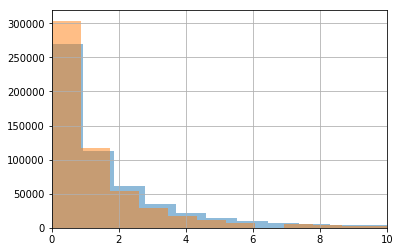

In [11]:
amz_review['HelpfulnessDenominator'].hist(bins=1000,alpha=0.5);
amz_review['HelpfulnessNumerator'].hist(bins=1000,alpha=0.5);
plt.xlim(0,10)

(100, 1000)

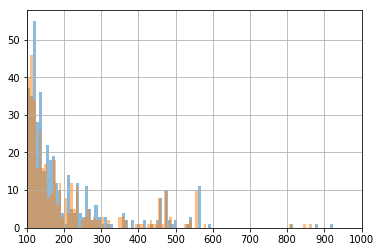

In [12]:
amz_review[amz_review['HelpfulnessDenominator']>100]['HelpfulnessDenominator'].hist(bins=100,alpha=0.5);
amz_review[amz_review['HelpfulnessNumerator']>100]['HelpfulnessNumerator'].hist(bins=100,alpha=0.5);
plt.xlim(100,1000)

(0, 400)

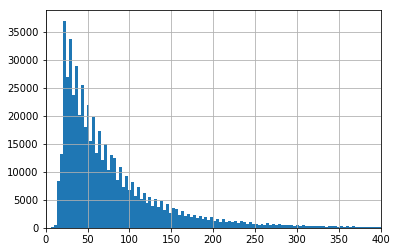

In [13]:
amz_review['Text_lenght'].hist(bins=1000);
plt.xlim(0,400)

In [14]:
amz_review['Time_converted']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
amz_review['Time_converted_ym']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [15]:
amz_review['Time_converted'].max()

'2012-10-26'

In [16]:
amz_review['Time_converted'].min()

'1999-10-08'

In [19]:
#had to remove time since same revireer/item had more than same time frame unfortunately and keeping time in subset would not clean them

amz_review_sorted_drop_duplicated=amz_review.drop_duplicates(subset=['UserId','ProductId'], keep='first', inplace=False)

In [20]:
amz_review_sorted_drop_duplicated.shape

(560804, 13)

In [21]:
((amz_review_sorted_drop_duplicated.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
dtype: int64

In [22]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_lenght                0
Time_converted             0
Time_converted_ym          0
dtype: int64

In [23]:
#clean cells in review that are parsed by mistake and still have html heading "<span "

def clean_span(col):  
    
    if('<span' not in col.lower()):

        return col.lower()

In [24]:
#pd.options.mode.chained_assignment = None
amz_review_sorted_drop_duplicated['Text_new']=amz_review_sorted_drop_duplicated['Text'].apply(clean_span)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
Text_lenght                 0
Time_converted              0
Time_converted_ym           0
Text_new                  373
dtype: int64

In [26]:
amz_review_sorted_drop_duplicated.dropna(inplace=True)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
dtype: int64

In [33]:
amz_review_sorted_drop_duplicated.shape

(560388, 14)

In [28]:
stop_word_list =[]
for word in open('stopword_short_long_mod.txt'):
    #print(word)
    stop_word_list.append(word.replace('\n',''))
    
stop_word_list=list(set(stop_word_list))   
len(stop_word_list)

642

In [29]:
#special characters
special_char_list=['\\','`','\"',"'",'*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']

In [30]:
def remove_stopword(col):
        #print(stop_word_list)
        col_list=[]
        txt_col_split=col.lower().replace('\n'," ").strip().split(" ")
        #print(txt_col_split)
        for word_ in txt_col_split:
            #print(word)
            #print(word in col.split(" "))
            #for stop_w in stop_word_list:               
            if ((word_ not in stop_word_list) and len(word)>3):
                #col=col.replace(word,"") #.replace("  "," ")
                #print(col)
                col_list.append(word_)

        return (col_list)             
                
def remove_specialchar(col):
        #print(stop_word_list)
        for word in special_char_list:
            #print(word)
            #print(word in col.split(" "))
            
            #for stop_w in stop_word_list:               
            if word in col: #col.split(" "):
                col=col.replace(word,"").replace("  "," ")
                #print(col)

        return col                  
    

#amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated.loc[:,'Text_new'].apply(remove_stopword)

In [31]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new'].apply(remove_specialchar)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new2'].apply(remove_stopword)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
amz_review_sorted_drop_duplicated['Text_new2'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [35]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
Text_new2                 0
dtype: int64

In [36]:
#amz_review_sorted_drop_duplicated.dtypes

In [37]:
def score_pos_neg(col):
    
    if col>3:
        return 1
    else:
        return 0
    

In [38]:
amz_review_sorted_drop_duplicated['score_pos_neg']=amz_review_sorted_drop_duplicated['Score'].apply(score_pos_neg)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


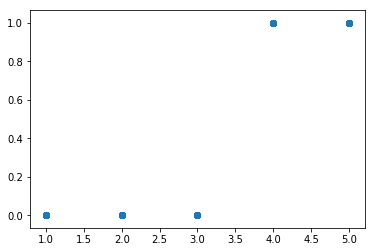

In [39]:
plt.scatter(amz_review_sorted_drop_duplicated['Score'],amz_review_sorted_drop_duplicated['score_pos_neg'])

In [40]:
amz_review_sorted_drop_duplicated.to_csv('amazon_review_parsed.csv',index=False)

In [83]:
amz_review_sorted_drop_duplicated.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,Text_new3,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,2011-06-13,2011-06,if you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[secret, ingredient, robitussin, addition, roo...",0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21,2012-10,great taffy at a great price. there was a wid...,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,...",1


(0, 20)

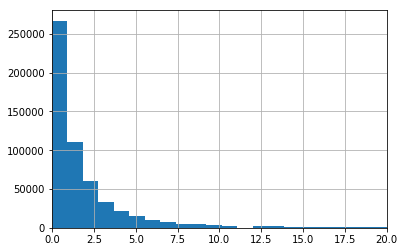

In [41]:
amz_review_sorted_drop_duplicated['HelpfulnessDenominator'].hist(bins=1000);
plt.xlim(0,20)

In [42]:
user_number_review=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)
#amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean()
user_number_review.head()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
UserId,,,,,,,,,,,,,,,
A3OXHLG6DIBRW8,419,419,419,419,419,419,419,419,419,419,419,419,419,419,419
AY12DBB0U420B,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
A281NPSIMI1C2R,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
A1YUL9PCJR3JTY,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
A1Z54EM24Y40LL,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251


In [44]:
user_top_reviewer=user_number_review[user_number_review['Id']>10][['Id']]
user_top_reviewer.head(10)   #11 to 419

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251
A2MUGFV2TDQ47K,201
AZV26LP92E6WU,167
AQQLWCMRNDFGI,167
A1UQBFCERIP7VJ,157


In [45]:
user_top_reviewer.to_csv('amazon_top_reviewer_list.csv')

In [51]:
#amz_review_sorted_drop_duplicated.groupby(by=['UserId'])['Time_converted'].max()

In [54]:
amz_review_sorted_drop_duplicated.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1


In [68]:
user_average_info=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean() #['UserId']  #=='A3OXHLG6DIBRW8' #.sort_values(by=['Text'],ascending=False)

In [69]:
user_average_info.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg
UserId,,,,,,,
#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,56.0,1.0
#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,21.0,1.0
#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,85.0,1.0
#oc-R10LT57ZGIB140,378693.0,0.0,0.0,3.0,1.310602e+09,45.0,0.0
#oc-R10UA029WVWIUI,136545.0,0.0,0.0,1.0,1.342483e+09,66.0,0.0


In [107]:
user_average_info.to_csv('amazon_reviewer_avg_info.csv')

In [70]:
user_top_reviewer.head()

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251


In [96]:
top_reviewer_avg_data=pd.merge(user_average_info,user_top_reviewer,how='inner',on='UserId')


In [97]:
top_reviewer_avg_data['ratio_helpful']=top_reviewer_avg_data['HelpfulnessNumerator']/top_reviewer_avg_data['HelpfulnessDenominator']

In [190]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [142]:
top_reviewer_avg_data['Time'][0]

1315171374.5454545

In [144]:
top_reviewer_avg_data['Time_converted']=top_reviewer_avg_data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [99]:
top_reviewer_avg_data=top_reviewer_avg_data[(top_reviewer_avg_data['ratio_helpful']>0.0) & (top_reviewer_avg_data['ratio_helpful']<1.0)]

In [314]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [133]:
colors = np.random.rand(top_reviewer_avg_data.shape[0])

In [293]:
# plt.scatter(top_reviewer_avg_data['Time_converted'],top_reviewer_avg_data['Score']);
# #plt.xlim(0,600);
# plt.xlabel('Date');
# plt.ylabel('Review Helpfullness 0-1 scale');
# plt.xticks(rotation=90);

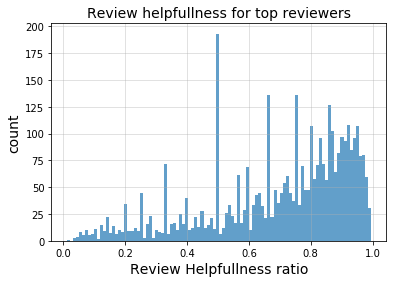

In [301]:
top_reviewer_avg_data['ratio_helpful'].hist(bins=100,label='review helpfullness top reviewers',alpha=0.7);
#plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'])
plt.xlabel('Review Helpfullness ratio',fontsize=14);
plt.ylabel('count',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfullness for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_dist.png')

In [302]:
# sns.distplot(top_reviewer_avg_data['ratio_helpful'],bins=100,label='review helpfullness')
# plt.xlabel('Review Helpfullness 0-1 scale');
# plt.ylabel('count');
# plt.xlim(0,1.0);


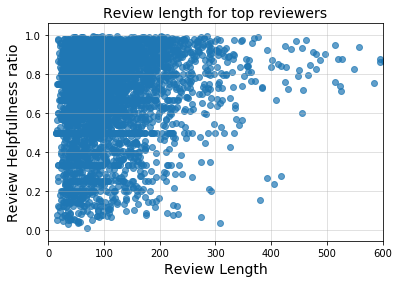

In [300]:
plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,600);
plt.xlabel('Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);
#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review length for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length.png')

In [159]:
#sns.scatterplot(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'])

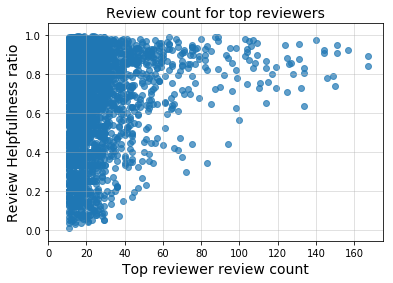

In [303]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,175);
plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_count.png')

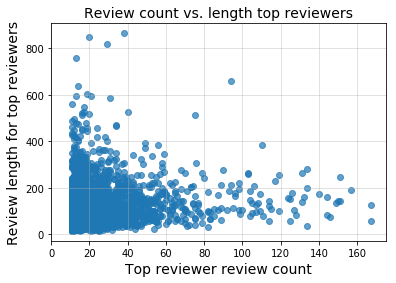

In [304]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['Text_lenght'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,175);

plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review length for top reviewers',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count vs. length top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length_count.png')

In [305]:
# plt.scatter(top_reviewer_avg_data['Score'],top_reviewer_avg_data['ratio_helpful']);
# plt.xlim(1.05,5);
# #no trend observed only less bad review on top reviewer

In [291]:
# df_2011_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2011-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2012-00')]
# df_2010_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2010-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2011-00')]
# df_2009_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2009-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2010-00')]


In [292]:
# df_2011_data['Time_converted_ym'] = pd.to_datetime(df_2011_data['Time_converted_ym']).dt.strftime('%H:%M')

In [289]:
# df_2011_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2011-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2012-00')]
# plt.figure(figsize=(24,4))
# sns.countplot(x="Time_converted_ym", data=df_2011_data)
# #sns.distplot(df_2011_data['Time_converted_ym']) didnot work
# #plt.hist(df_2011_data['Time_converted_ym']) too too long
# plt.xticks(rotation=90);

In [290]:
# plt.figure(figsize=(24,6))
# grp_date=amz_review_sorted_drop_duplicated.groupby(by=['Time_converted_ym']).count();
# grp_date.reset_index(inplace=True);
# plt.plot_date(x=grp_date['Time_converted_ym'],y=grp_date['Score']);
# plt.xticks(rotation=90);
# plt.xlim('2000-01','2012-10');
# #grp_date

In [254]:
grp_s1=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==1]
grp_s2=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==2]
grp_s3=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==3]
grp_s4=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==4]
grp_s5=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==5]

grp_date_1=grp_s1.groupby(by=['Time_converted_ym']).count();
grp_date_2=grp_s2.groupby(by=['Time_converted_ym']).count();
grp_date_3=grp_s3.groupby(by=['Time_converted_ym']).count();
grp_date_4=grp_s4.groupby(by=['Time_converted_ym']).count();
grp_date_5=grp_s5.groupby(by=['Time_converted_ym']).count();

grp_date_1.reset_index(inplace=True); #to make it to column
grp_date_2.reset_index(inplace=True);
grp_date_3.reset_index(inplace=True);
grp_date_4.reset_index(inplace=True);
grp_date_5.reset_index(inplace=True);

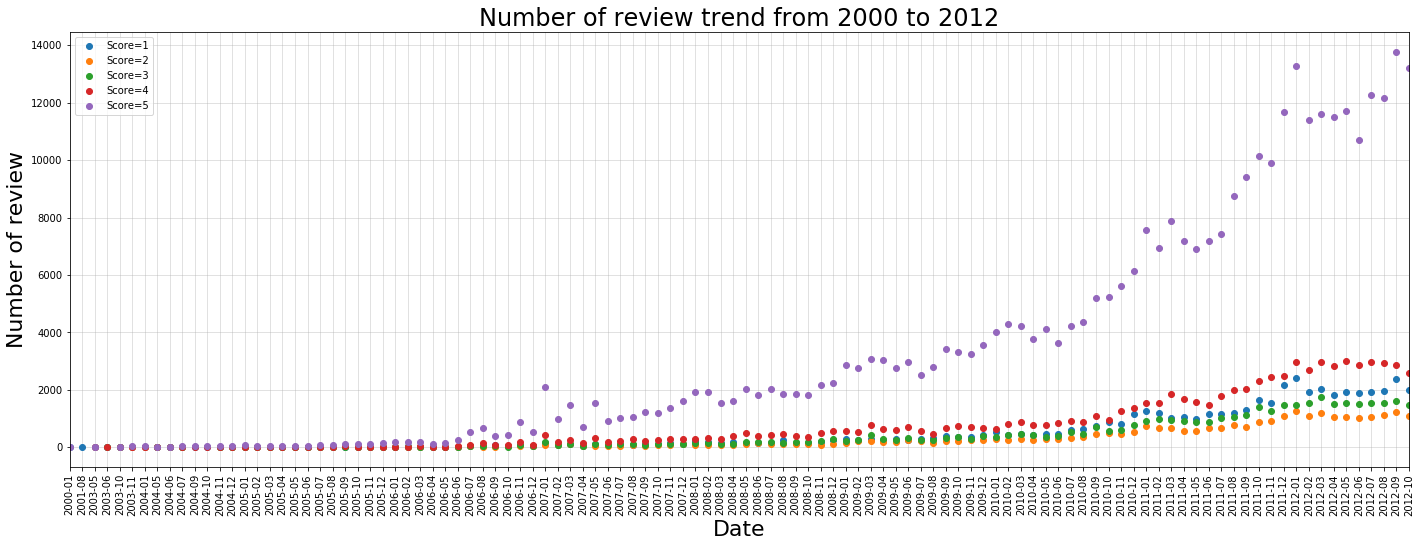

In [263]:
plt.figure(figsize=(24,8))

plt.plot_date(x=grp_date_1['Time_converted_ym'],y=grp_date_1['Score'],label='Score=1');
plt.plot_date(x=grp_date_2['Time_converted_ym'],y=grp_date_2['Score'],label='Score=2');
plt.plot_date(x=grp_date_3['Time_converted_ym'],y=grp_date_3['Score'],label='Score=3');
plt.plot_date(x=grp_date_4['Time_converted_ym'],y=grp_date_4['Score'],label='Score=4');
plt.plot_date(x=grp_date_5['Time_converted_ym'],y=grp_date_5['Score'],label='Score=5');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Number of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_trend.png')
#grp_date

In [279]:
#amz_review_sorted_drop_duplicated(by=['Time_converted_ym']).count()
grp_avg_date=amz_review_sorted_drop_duplicated.groupby(by=['Time_converted_ym']).mean()
grp_avg_date.reset_index(inplace=True);
grp_avg_date['Helpfulness_ratio']=grp_avg_date['HelpfulnessNumerator']/grp_avg_date['HelpfulnessDenominator']

In [281]:
grp_avg_date.isnull().sum()

Time_converted_ym         0
Id                        0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Text_lenght               0
score_pos_neg             0
Helpfulness_ratio         0
dtype: int64

In [282]:
grp_avg_date.head()

,Time_converted_ym,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Helpfulness_ratio
0,1999-10,150512.500000,1.000,1.000,5.0,940075200.0,81.50,1.000,1.000000
1,1999-12,377094.500000,0.750,1.500,5.0,944352000.0,35.75,1.000,0.500000
2,2000-01,330241.500000,7.875,9.375,3.5,947797200.0,51.00,0.625,0.840000
3,2000-02,352267.666667,2.000,3.000,4.0,951523200.0,244.00,1.000,0.666667
4,2000-06,211823.600000,3.400,4.800,5.0,960785280.0,42.60,1.000,0.708333


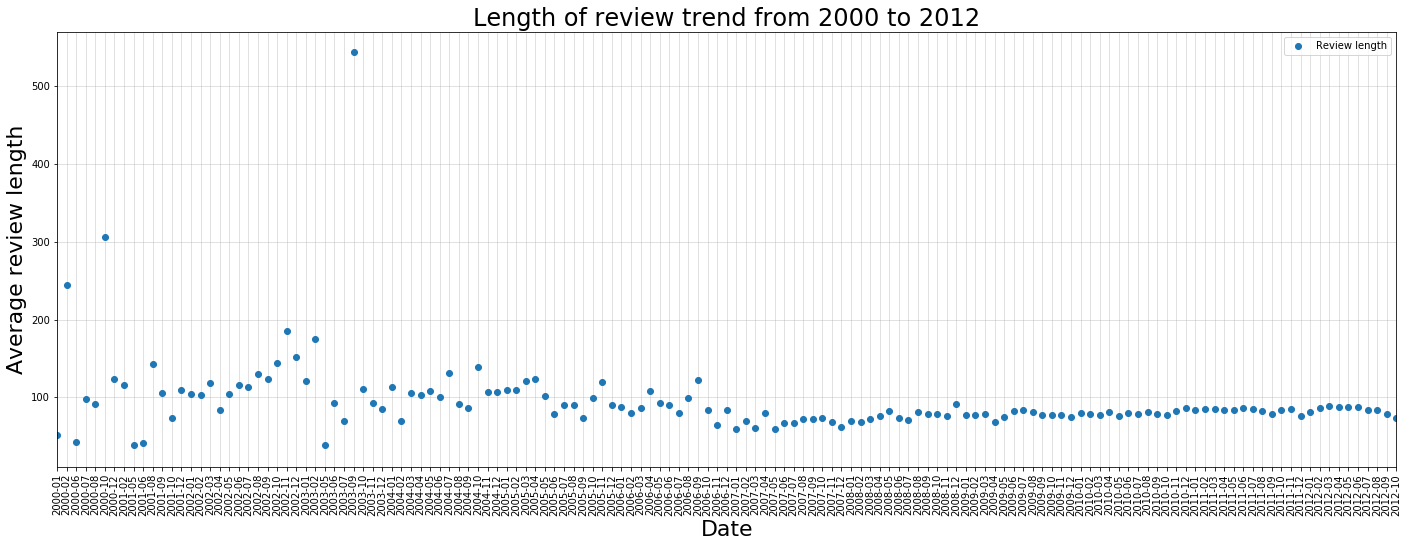

In [287]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Text_lenght'],label='Review length');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average review length',fontsize=22)
plt.title('Length of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_length_trend.png')
#stable review length

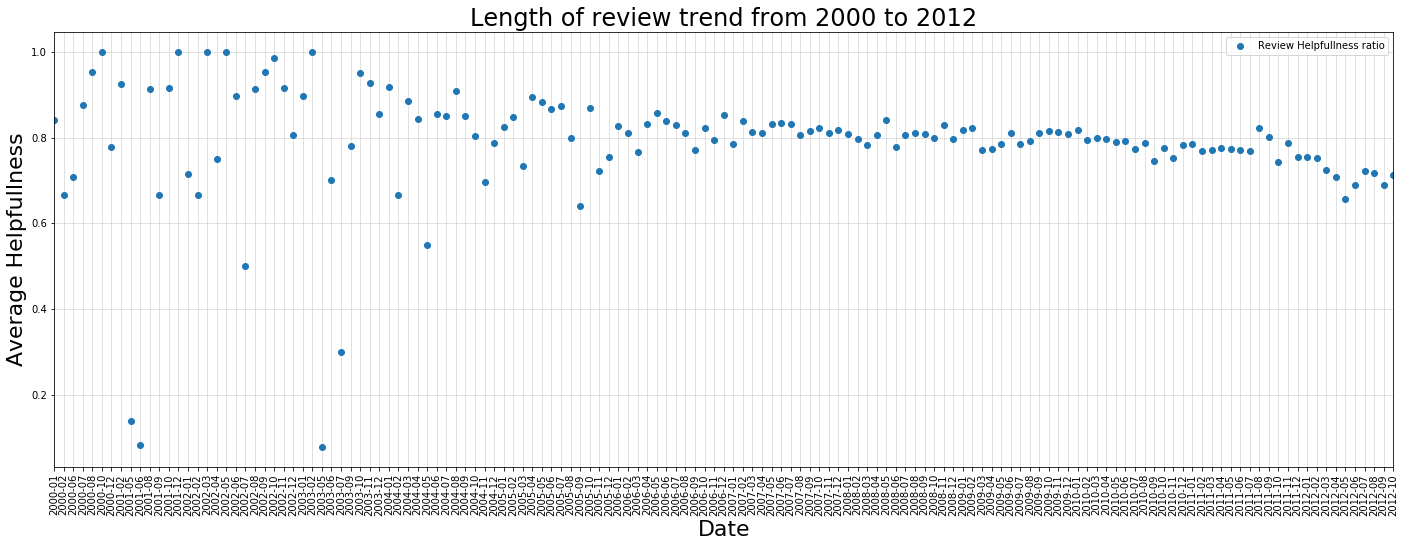

In [288]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Helpfulness_ratio'],label='Review Helpfullness ratio');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average Helpfullness',fontsize=22)
plt.title('Length of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_helpful_trend.png')

#drop can be due to visitor not getting time yet to check the reviews of 2012

In [195]:
# df_2011_data['Time_converted'] = df_2011_data['Time_converted'].map(lambda x:x.date())
# plt.plot_date(x=df_2011_data['Score'],y=df_2011_data['Time_converted'])

In [189]:
#sns.countplot(x="Score", data=df_2011_data)
#sns.countplot(x="Score", data=df_2010_data)
#sns.countplot(x="Score", data=df_2009_data)
#sns.factorplot(x="Time_converted_ym", data=df_2011_data)

In [315]:
top_reviewer_avg_data.to_csv('top_reviewer_avg_data.csv',index=False)

grp_avg_date.to_csv('grp_avg_date.csv',index=False)

In [126]:
check_name=pd.read_csv('amazon_top_reviewer_list.csv')

In [316]:
#amz_review_sorted_drop_duplicated.head()

In [317]:
amz_review_sorted_drop_duplicated.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,2011-06-13,2011-06,if you are looking for the secret ingredient i...,"[secret, ingredient, robitussin, addition, roo...",0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21,2012-10,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",1


In [318]:
amz_review_sorted_drop_duplicated.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght', 'Time_converted', 'Time_converted_ym', 'Text_new',
       'Text_new2', 'score_pos_neg'],
      dtype='object')

In [319]:
amz_review_less_col=amz_review_sorted_drop_duplicated[['Score','Time_converted_ym', 'Text_new2', 'score_pos_neg']]

In [320]:
amz_review_less_col.head()

,Score,Time_converted_ym,Text_new2,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [323]:
amz_review_less_col_rename=amz_review_less_col.rename(columns={'Text_new2':'Review_word_list'})

In [324]:
amz_review_less_col_rename.head()

,Score,Time_converted_ym,Review_word_list,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [325]:
amz_review_less_col_rename.to_csv('amz_review_less_col_rename.csv',index=False)

# Work on sentiment

In [2]:
amz_review_less_col_rename=pd.read_csv('amz_review_less_col_rename.csv')
amz_review_less_col_rename['Review_word_list']=amz_review_less_col_rename['Review_word_list'].apply(lambda x: eval(x))

In [3]:
amz_review_less_col_rename.head()

,Score,Time_converted_ym,Review_word_list,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [4]:
amz_review_less_col_rename['Score'].value_counts()

5    358021
4     79433
1     51509
3     41992
2     29433
Name: Score, dtype: int64

In [5]:
amz_review_less_col_rename['Review_word_list'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [6]:
from tqdm import tqdm_notebook as tqdm
import time

for i in tqdm(range(int(10e6))):
    pass

In [7]:
counter_pos=Counter()
counter_neg=Counter()
counter_total=Counter()

In [8]:
review_vec=amz_review_less_col_rename['Review_word_list']
score_vec=amz_review_less_col_rename['score_pos_neg']
actual_score_vec=amz_review_less_col_rename['Score']

In [9]:
# very Negative review

for i,review in enumerate(review_vec):
    
    if(i>10 and i<100 and score_vec[i]==0 and actual_score_vec[i]!=3):
        print('Negative',actual_score_vec[i],i,'\n')
        print(review)
        print(' \n')
    
    #print

Negative 1 12 

['cats', 'happily', 'eating', 'felidae', 'platinum', 'years', 'new', 'bag', 'shape', 'food', 'new', 'food', 'bowls', 'bowls', 'sit', 'full', 'kitties', 'will', 'touch', 'food', 'ive', 'noticed', 'similar', 'reviews', 'formula', 'changes', 'unfortunately', 'need', 'find', 'new', 'food', 'cats', 'will', 'eat']
 

Negative 2 16 

['love', 'eating', 'good', 'watching', 'tv', 'movies', 'sweet', 'like', 'transfer', 'zip', 'lock', 'baggie', 'stay', 'fresh', 'time', 'eating']
 

Negative 1 26 

['candy', 'red', 'flavor', 'plan', 'chewy', 'buy', 'again']
 

Negative 1 50 

['oatmeal', 'good', 'mushy', 'soft', 'like', 'quaker', 'oats']
 

Negative 1 62 

['arrived', 'days', 'stale', 'eat', 'bags']
 

Negative 2 67 

['purchased', 'mango', 'flavor', 'like', 'mango', 'hint', 'sweetness', 'unfortunately', 'hint', 'aftertaste', 'like', 'licorice', 'ive', 'consuming', 'sports', 'nutrition', 'products', 'decades', 'familiar', 'like', 'taste', 'products', 'ive', 'mango', 'flavor', 'appe

In [10]:
for i,review in enumerate(review_vec):
    
    if(i>10 and i<20 and score_vec[i]==1):
        print('Negative',actual_score_vec[i],i,'\n')
        print(review)
        print(' \n')

Negative 5 11 

['boys', 'needed', 'lose', 'weight', 'food', 'floor', 'chubby', 'guy', 'proteinrich', 'byproduct', 'food', 'higher', 'skinny', 'boy', 'jump', 'higher', 'food', 'sits', 'going', 'stale', 'food', 'chubby', 'boy', 'losing', 'ounce', 'week']
 

Negative 4 13 

['good', 'flavor', 'securely', 'packed', 'fresh', 'delicious', 'love', 'twizzlers']
 

Negative 5 14 

['strawberry', 'twizzlers', 'guilty', 'pleasure', 'yummy', 'pounds', 'will', 'son']
 

Negative 5 15 

['daughter', 'loves', 'twizzlers', 'shipment', 'pounds', 'hit', 'spot', 'exactly', 'expectsix', 'packages', 'strawberry', 'twizzlers']
 

Negative 5 17 

['satisfied', 'twizzler', 'purchase', 'shared', 'enjoyed', 'will', 'definitely', 'ordering']
 

Negative 5 18 

['twizzlers', 'strawberry', 'childhood', 'favorite', 'candy', 'lancaster', 'pennsylvania', 'candies', 'oldest', 'confectionery', 'firms', 'united', 'states', 'subsidiary', 'hershey', 'company', 'company', 'established', 'young', 'smylie', 'apple', 'licori

In [11]:
len(review_vec)

560388

In [12]:

#for i,review in tqdm(enumerate(review_vec)):
for i in tqdm(range(len(review_vec))):
    
    try:
        #print(review)
    
        for word in review_vec[i]:        
            counter_total[word] += 1

            if(score_vec[i]==1):
                counter_pos[word] += 1

            if(score_vec[i]==0):
                counter_neg[word] += 1
    except:   
        continue

In [13]:
print(len(counter_neg),len(counter_pos),len(counter_total))

92005 186454 223134


In [14]:
counter_neg.most_common()[0:20]

[('br', 70376),
 ('like', 68473),
 ('taste', 49301),
 ('product', 45141),
 ('coffee', 38648),
 ('good', 38467),
 ('flavor', 34803),
 ('will', 30477),
 ('food', 27022),
 ('tea', 25483),
 ('buy', 20925),
 ('amazon', 17527),
 ('better', 17436),
 ('again', 17404),
 ('time', 17357),
 ('box', 16800),
 ('dog', 16407),
 ('water', 15809),
 ('great', 15632),
 ('bought', 15343)]

In [15]:
counter_pos.most_common()[0:20]

[('br', 191475),
 ('like', 178215),
 ('good', 153115),
 ('great', 145364),
 ('coffee', 119847),
 ('taste', 114447),
 ('love', 109636),
 ('flavor', 104099),
 ('tea', 104089),
 ('product', 99629),
 ('will', 93568),
 ('food', 89946),
 ('use', 67065),
 ('best', 66555),
 ('time', 62180),
 ('amazon', 59952),
 ('find', 59420),
 ('price', 58940),
 ('ive', 57715),
 ('well', 56124)]

In [16]:
counter_pos_neg=Counter()

#words called in for over 100 times in whole reviews

for word,count in tqdm(counter_total.most_common()):
    if(count>100):
        try: 
            counter_pos_neg[word]=np.log(counter_pos[word]/float(counter_neg[word]+1))
        except:
            continue

In [17]:
dict_top_pos=dict(counter_pos_neg.most_common(40))#[0:30]
dict_top_neg=dict(counter_pos_neg.most_common()[:-40:-1])

In [18]:
# plt.figure(figsize=(20,4))
# plt.bar(list(dict_top_neg.keys()),list(dict_top_neg.values()),alpha=0.5,color='r')
# plt.xticks(rotation=90,fontsize=14);

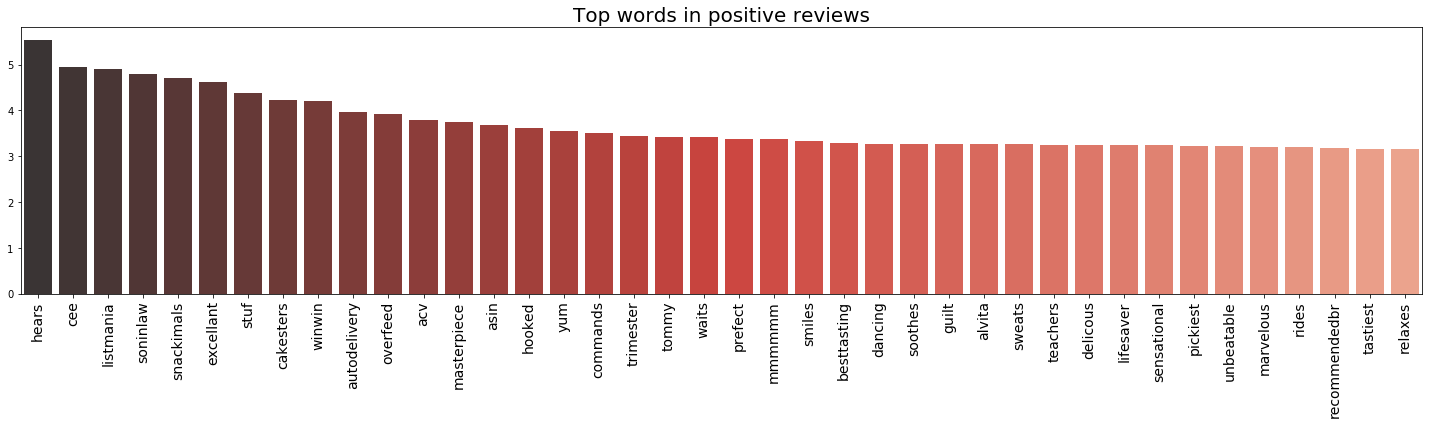

In [19]:
# plt.autolayout : True
# plt.tight_layout();
plt.figure(figsize=(20,6))
sns.barplot(list(dict_top_pos.keys()), list(dict_top_pos.values()), palette="Reds_d")
plt.xticks(rotation=90,fontsize=14);
plt.title('Top words in positive reviews',fontsize=20);
plt.tight_layout();
plt.savefig('word__freq_pos_rev.png')

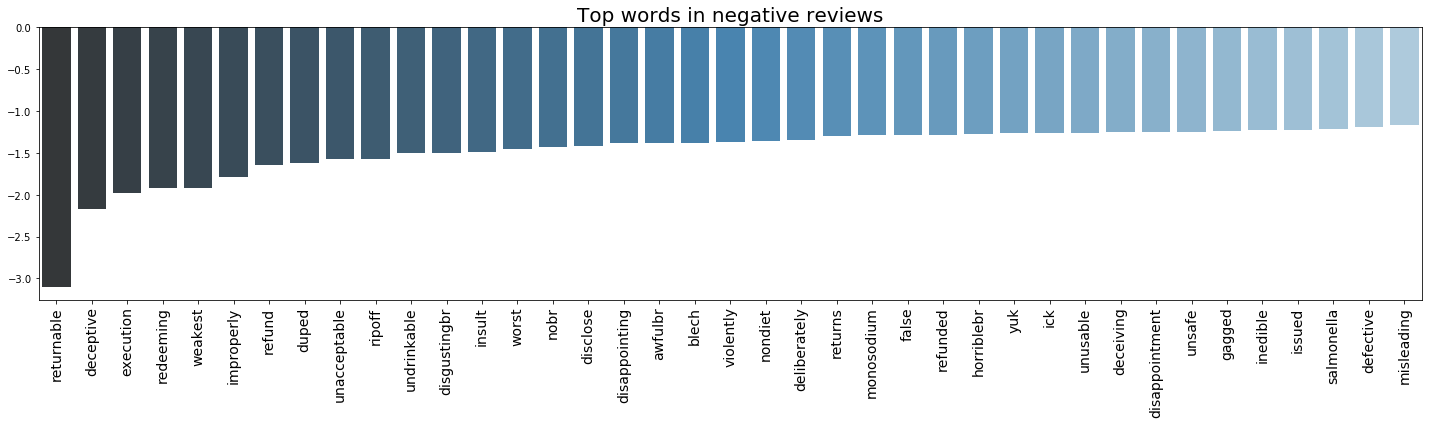

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(list(dict_top_neg.keys()), list(dict_top_neg.values()), palette="Blues_d")
plt.xticks(rotation=90,fontsize=14);
plt.title('Top words in negative reviews',fontsize=20);
plt.tight_layout();
plt.savefig('word__freq_neg_rev.png')

In [21]:
counter_total.most_common()[3000:3020]

[('nuggets', 713),
 ('plum', 711),
 ('snackbr', 710),
 ('impressive', 709),
 ('chocolatebr', 709),
 ('expire', 709),
 ('appeared', 708),
 ('inferior', 707),
 ('enhance', 707),
 ('considerably', 707),
 ('fashion', 706),
 ('thailand', 706),
 ('andbr', 706),
 ('pregnant', 706),
 ('uk', 705),
 ('tonight', 705),
 ('reported', 705),
 ('occupied', 705),
 ('zing', 704),
 ('lemongrass', 704)]

In [22]:
counter_total.most_common()[9700:9720] #10000 ~ 100 count

[('smack', 105),
 ('barrels', 105),
 ('grabs', 105),
 ('yunnan', 105),
 ('wheaten', 105),
 ('bookbr', 105),
 ('bins', 105),
 ('epic', 105),
 ('refrigeratorbr', 105),
 ('coin', 105),
 ('appetit', 105),
 ('additivesbr', 105),
 ('rod', 105),
 ('fabric', 105),
 ('speciality', 105),
 ('pricei', 105),
 ('repackage', 105),
 ('devil', 105),
 ('outright', 105),
 ('apologized', 105)]

In [23]:
len(counter_total)

223134

Mean: 1.1207146656718976


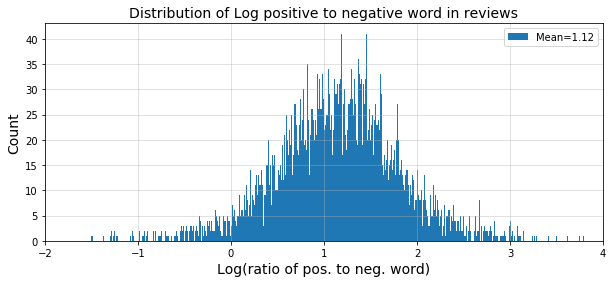

In [24]:
print('Mean:',np.mean(list(set(counter_pos_neg.values()))))
plt.figure(figsize=(10,4));
plt.hist(counter_pos_neg.values(),bins=2000,label='Mean=1.12');
plt.xlim(-2,4)

plt.xlabel('Log(ratio of pos. to neg. word)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Distribution of Log positive to negative word in reviews',fontsize=14)
plt.grid(linewidth=0.5,alpha=0.75)
plt.legend(loc='upper right');
plt.savefig('distribution_log_pos_neg_word_review.png')

In [25]:
print(len(counter_pos_neg.most_common()),len(counter_pos.most_common()),len(counter_neg.most_common()),len(counter_total.most_common()))

9967 186454 92005 223134


In [26]:
print(counter_pos_neg['neutral'],counter_pos_neg['diet'],counter_pos_neg['awful'],counter_pos_neg['food'])

0.861138911799075 1.2563519642794356 -0.9689539937489737 1.2025211350219227


In [27]:
#generally 10000 most commnon about at least 100 repetition in reviews

top_10000_common_words_dic=dict(counter_total.most_common()[0:10000])

In [28]:
top_10000_common_words_list=(list(top_10000_common_words_dic.keys()))
print(len(top_10000_common_words_list))

10000


In [29]:
word_to_index={}
index_to_word={}

for i,word in enumerate(top_10000_common_words_list):
    word_to_index[word]=i
    
for word,i in word_to_index.items():
    index_to_word[i]=word
#print(word_to_index)
#print(index_to_word)
# {'br': 0, 'like': 1, 'good': 2, 'taste': 3, 'great': 4, 'coffee': 5, 'product': 6, 'flavor': 7, 'tea': 8, 'love': 9, 'will': 10, 'food': 11, 'use': 12
#{0: 'br', 1: 'like', 2: 'good', 3: 'taste', 4: 'great', 5: 'coffee', 6: 'product', 7: 'flavor', 8: 'tea', 9: 'love', 10: 'will', 11: 'food', 12:

In [30]:
review_vec_index=[]
review_label=[]
review_score=[]

for i in tqdm(range(len(review_vec))):
    
    len_rev=len(review_vec[i])
    if(len_rev>0 and len_rev<1750):  #clean very short and very long reviews
        indices = set()
        for word in review_vec[i]:
            if word in word_to_index.keys():
                indices.add(word_to_index[word])
        review_vec_index.append(list(indices))
        review_label.append(score_vec[i])
        review_score.append(actual_score_vec[i])
                
print(len(review_vec_index),len(review_label),len(review_score))               


560380 560380 560380


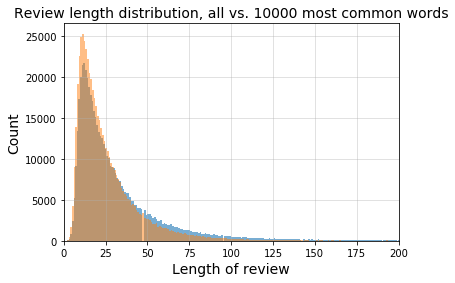

In [31]:
review_len_vec = pd.Series(review_vec).apply(lambda x: len(x)) 
review_len_vec_index = pd.Series(review_vec_index).apply(lambda x: len(x))

review_len_vec.hist(bins=1750,alpha=0.6,label='all words');
review_len_vec_index.hist(bins=589,alpha=0.5,label='10000 most common');
plt.xlim(0,200)
#plt.ylim(0,500)
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlabel('Length of review',fontsize=14);
plt.ylabel('Count',fontsize=14);

plt.title('Review length distribution, all vs. 10000 most common words',fontsize=14);
plt.savefig('review_length_dist_before_after.png')

count    560380.000000
mean          0.780624
std           0.413824
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64


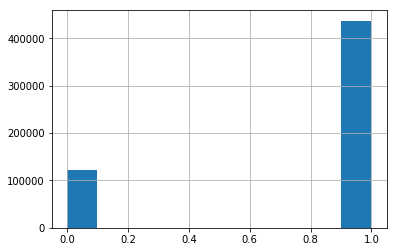

In [32]:
print(pd.Series(review_label).describe())
score_vec.hist()

In [33]:
review_len_vec_index.describe()

count    560380.000000
mean         25.400057
std          20.670301
min           1.000000
25%          12.000000
50%          19.000000
75%          31.000000
max         589.000000
dtype: float64

In [34]:
review_len_vec.describe()

count    560388.000000
mean         32.635103
std          33.231581
min           0.000000
25%          14.000000
50%          23.000000
75%          39.000000
max        1714.000000
Name: Review_word_list, dtype: float64

In [35]:
for i,review in enumerate(review_vec_index):
    if(i<10):
        print(i,review_vec_index[i],review_label[i],review_score[i])

0 [352, 1, 2, 8259, 6, 872, 4745, 4842, 11, 77, 2235, 1421, 21, 22, 246, 283, 61, 31] 1 5
1 [1186, 964, 6, 3272, 1802, 1773, 173, 7437, 1649, 2769, 5371, 734, 63] 0 1
2 [9344, 524, 2709, 1942, 28, 1948, 160, 6694, 41, 172, 302, 303, 946, 448, 326, 2125, 80, 1491, 4439, 7384, 7517, 861, 114, 1651, 7413, 5110, 1787, 2174, 383] 1 4
3 [66, 2, 3140, 518, 7, 2159, 336, 1073, 404, 1109, 598, 763] 0 2
4 [4, 326, 1709, 3086, 1710, 205, 17, 401, 253, 958] 1 5
5 [1153, 1418, 267, 3086, 6287, 26, 421, 1191, 40, 41, 176, 49, 1073, 51, 308, 700, 190, 66, 841, 80, 1109, 1502, 864, 878, 238, 2166] 1 4
6 [448, 128, 930, 290, 4, 903, 744, 745, 41, 877, 3086, 816, 49, 241, 114, 20, 147, 1148, 159] 1 5
7 [448, 2, 41, 3086, 241, 49, 82, 83, 245, 607] 1 5
8 [101, 5765, 9, 4425, 7241, 2828, 1422, 23, 57] 1 5
9 [2, 2020, 133, 11, 1808, 500, 2453, 22, 59, 413, 63] 1 5


In [36]:
review_score=np.array(review_score)
review_vec_index=np.array(review_vec_index)

In [37]:
review_5_index=[(review_score)==5]
review_4_index=[(review_score)==4]
review_2_index=[(review_score)==2]
review_1_index=[(review_score)==1]

In [38]:
review_5_index

[array([ True, False, False, ...,  True,  True,  True])]

In [39]:
max_per_pos_neg=75000
counter_pos=0
counter_neg=0
review_vec_index_even=[]
review_label_even=[]
review_score_even=[]

for i in tqdm(range(len(review_score))):
    if((review_score[i]==5 or review_score[i]==4) and counter_pos<max_per_pos_neg):
        
        review_vec_index_even.append(review_vec_index[i])
        review_label_even.append(review_label[i])
        review_score_even.append(review_score[i])
        counter_pos=counter_pos+1
        
    if((review_score[i]==1 or review_score[i]==2) and counter_neg<max_per_pos_neg):
        
        review_vec_index_even.append(review_vec_index[i])
        review_label_even.append(review_label[i])
        review_score_even.append(review_score[i])
        counter_neg=counter_neg+1        
        
        

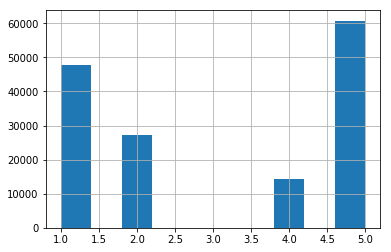

In [40]:
pd.Series(review_score_even).hist()

In [41]:
len(review_vec_index_even)

150000

In [42]:
counter_pos

75000

In [43]:
review_vec_index_pad=sequence.pad_sequences(review_vec_index_even,maxlen=100)
review_label=np.array(review_label_even)

In [44]:
review_vec_index_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1186,
        964,    6, 3272, 1802, 1773,  173, 7437, 1649, 2769, 5371,  734,
         63], dtype=int32)

In [45]:
review_label

array([1, 0, 1, ..., 0, 0, 0])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(review_vec_index_pad, review_label, test_size=0.33, random_state=42)

In [47]:
y_train.sum()/review_label.sum()

0.6709466666666667

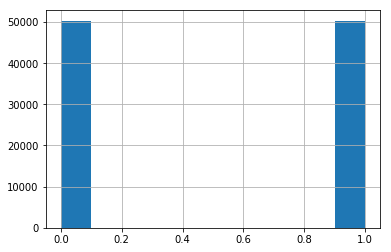

In [48]:
pd.Series(y_train).hist()

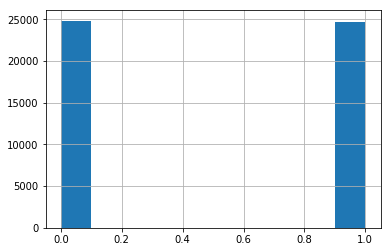

In [49]:
pd.Series(y_test).hist()

In [328]:
max_feature=10000
max_len=100

In [226]:
#glove_dir='../glove.6B'

embedding_index={}
#path_glove_file=os.path.join(glove_dir,'glove.6B.100d.txt')  #100 size vector

path_glove_file='glove.6B.100d.txt'

f=open(path_glove_file)

for line in f:   #line by line
    
    line_=line.split()
    word_=line_[0]
    coefs=np.asarray(line_[1:],dtype='float32')
    embedding_index[word_]=coefs
    
f.close()

In [238]:
embedding_index['bad']

array([ 0.39456  , -0.24717  ,  1.0319   , -0.61444  , -1.2376   ,
        0.051794 , -0.55112  , -0.31014  , -0.025735 , -0.24709  ,
        0.25836  ,  0.34899  ,  0.46176  ,  0.44237  ,  0.354    ,
        0.21262  , -0.26312  , -0.17128  ,  0.44013  ,  1.1284   ,
        0.37259  ,  0.41969  , -0.2534   , -0.051885 , -0.34917  ,
        0.15298  , -0.68444  , -0.19514  , -0.018647 ,  0.084191 ,
        0.14569  ,  0.3869   ,  0.023524 , -0.37861  , -0.65081  ,
        0.010398 , -0.50087  , -0.087368 ,  0.098617 , -0.21907  ,
       -0.072412 , -0.10247  , -0.3148   , -0.307    , -0.30457  ,
       -0.14329  ,  0.10313  , -0.040487 , -0.095922 , -1.192    ,
       -0.063356 ,  0.034127 , -0.057674 ,  0.56582  ,  0.082541 ,
       -2.4617   ,  0.48029  ,  0.72806  ,  1.2841   ,  0.10672  ,
       -0.045119 ,  1.0117   , -0.97928  ,  0.022828 ,  0.46876  ,
       -0.026875 ,  0.80018  , -0.23101  ,  0.086699 , -0.74338  ,
       -0.38738  , -0.1924   , -0.13292  ,  0.52347  ,  0.3565

In [239]:
embedding_dim=100  # vector size 100

embedding_matrix=np.zeros((max_feature,embedding_dim))


for word_,index_ in word_to_index.items():  #from imdb vocabulary
    
    if(index_<max_feature):
        
        embedding_vector=embedding_index.get(word_)
        if embedding_vector is not None:
            embedding_matrix[index_]=embedding_vector  #embedding index  400000 of 100 len vec in dict

## try normal sequential

In [245]:

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [246]:
# model.layers[0].set_weights([embedding_matrix])
# model.layers[0].trainable=True

In [247]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]


In [248]:
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 300363 samples, validate on 75091 samples
Epoch 1/5
300363/300363 [==============================] - 125s 415us/step - loss: 0.6520 - acc: 0.7671 - val_loss: 0.3906 - val_acc: 0.8558

Epoch 00001: val_loss improved from inf to 0.39061, saving model to my_model.h5
Epoch 2/5
300363/300363 [==============================] - 127s 423us/step - loss: 0.3789 - acc: 0.8183 - val_loss: 0.4294 - val_acc: 0.8297

Epoch 00002: val_loss did not improve from 0.39061
Epoch 3/5
 64384/300363 [=====>........................] - ETA: 1:35 - loss: 0.3504 - acc: 0.8068

KeyboardInterrupt: 

## try GRU

In [62]:

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True))
model.add(layers.GRU(64,activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 32)           22368     
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 2,041,057
Trainable params: 2,041,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]


In [338]:
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/5
80400/80400 [==============================] - 229s 3ms/step - loss: 0.5286 - acc: 0.7600 - val_loss: 0.3781 - val_acc: 0.8395

Epoch 00001: val_loss improved from inf to 0.37814, saving model to my_model.h5
Epoch 2/5
80400/80400 [==============================] - 246s 3ms/step - loss: 0.4073 - acc: 0.8348 - val_loss: 0.3625 - val_acc: 0.8536

Epoch 00002: val_loss improved from 0.37814 to 0.36248, saving model to my_model.h5
Epoch 3/5
80400/80400 [==============================] - 231s 3ms/step - loss: 0.3805 - acc: 0.8530 - val_loss: 0.3545 - val_acc: 0.8666

Epoch 00003: val_loss improved from 0.36248 to 0.35451, saving model to my_model.h5
Epoch 4/5
80400/80400 [==============================] - 230s 3ms/step - loss: 0.3475 - acc: 0.8680 - val_loss: 0.3513 - val_acc: 0.8724

Epoch 00004: val_loss improved from 0.35451 to 0.35135, saving model to my_model.h5
Epoch 5/5
80400/80400 [==============================] - 230s 3ms/

In [339]:
model.evaluate(X_test,y_test)

49500/49500 [==============================] - 93s 2ms/step


[0.3494738219374358, 0.8660808080663585]

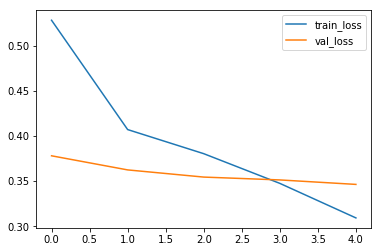

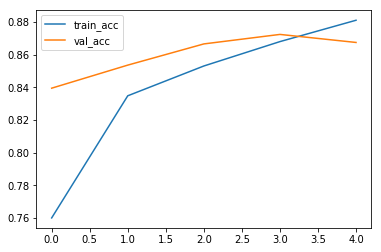

In [342]:
list_epoch=np.arange(0,5)
plt.plot(list_epoch,history.history['loss'])

plt.plot(list_epoch,history.history['val_loss'])

plt.legend(['train_loss','val_loss'])
plt.show()


plt.plot(list_epoch,history.history['acc'])

plt.plot(list_epoch,history.history['val_acc'])
plt.legend(['train_acc','val_acc'])
plt.show()

## try GRU more layer more output size

In [61]:
max_feature=10000
embedding_dim=256
max_len=100

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.GRU(128,dropout=0.1,recurrent_dropout=0.5,return_sequences=True))
model.add(layers.GRU(64,activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 256)          2560000   
_________________________________________________________________
gru_6 (GRU)                  (None, 100, 128)          147840    
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                37056     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,744,961
Trainable params: 2,744,961
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]


In [63]:
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/5
80400/80400 [==============================] - 454s 6ms/step - loss: 0.5072 - acc: 0.7829 - val_loss: 0.4048 - val_acc: 0.8643

Epoch 00001: val_loss improved from inf to 0.40483, saving model to my_model.h5
Epoch 2/5
80400/80400 [==============================] - 476s 6ms/step - loss: 0.4739 - acc: 0.8292 - val_loss: 0.3669 - val_acc: 0.8530

Epoch 00002: val_loss improved from 0.40483 to 0.36689, saving model to my_model.h5
Epoch 3/5
80400/80400 [==============================] - 555s 7ms/step - loss: 0.3963 - acc: 0.8483 - val_loss: 0.3648 - val_acc: 0.8711

Epoch 00003: val_loss improved from 0.36689 to 0.36481, saving model to my_model.h5
Epoch 4/5
80400/80400 [==============================] - 525s 7ms/step - loss: 0.3760 - acc: 0.8519 - val_loss: 0.3777 - val_acc: 0.8665

Epoch 00004: val_loss did not improve from 0.36481
Epoch 5/5
80400/80400 [==============================] - 580s 7ms/step - loss: 0.3305 - acc: 0.8522

In [65]:
model.evaluate(X_test,y_test)

49500/49500 [==============================] - 152s 3ms/step


[0.3609446431049193, 0.8630505050360554]

## try embedding pretrained again

In [51]:
max_feature=10000
embedding_dim=200
max_len=100

embedding_index={}
#path_glove_file=os.path.join(glove_dir,'glove.6B.100d.txt')  #100 size vector

path_glove_file='glove.6B.200d.txt'

f=open(path_glove_file)

for line in f:   #line by line
    
    line_=line.split()
    word_=line_[0]
    coefs=np.asarray(line_[1:],dtype='float32')
    embedding_index[word_]=coefs
    
f.close()

################################################################

embedding_dim=200  # vector size 100

embedding_matrix=np.zeros((max_feature,embedding_dim))


for word_,index_ in word_to_index.items():  #from imdb vocabulary
    
    if(index_<max_feature):
        
        embedding_vector=embedding_index.get(word_)
        if embedding_vector is not None:
            embedding_matrix[index_]=embedding_vector 

In [52]:
max_feature=10000
embedding_dim=200
max_len=100

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.GRU(128,dropout=0.2,recurrent_dropout=0.5,activation='tanh',return_sequences=True))
#model.add(layers.GRU(128,dropout=0.1,recurrent_dropout=0.5,return_sequences=True))
model.add(layers.GRU(64,activation='relu',dropout=0.2,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 128)          126336    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37056     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,163,457
Trainable params: 2,163,457
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/5
80400/80400 [==============================] - 589s 7ms/step - loss: 0.5671 - acc: 0.7314 - val_loss: 0.4421 - val_acc: 0.8092

Epoch 00001: val_loss improved from inf to 0.44210, saving model to my_model.h5
Epoch 2/5
49280/80400 [=================>............] - ETA: 3:41 - loss: 0.5162 - acc: 0.7666

KeyboardInterrupt: 

## LSTM

In [73]:
max_feature=10000
embedding_dim=256
max_len=100

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.LSTM(128,dropout=0.2,recurrent_dropout=0.5,activation='tanh',return_sequences=True))
#model.add(layers.GRU(128,dropout=0.1,recurrent_dropout=0.5,return_sequences=True))
model.add(layers.LSTM(64,activation='tanh',dropout=0.2,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 256)          2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 128)          197120    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 2,806,593
Trainable params: 2,806,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=3,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]
history=model.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/10
80400/80400 [==============================] - 621s 8ms/step - loss: 0.5007 - acc: 0.7968 - val_loss: 0.4194 - val_acc: 0.8586

Epoch 00001: val_loss improved from inf to 0.41938, saving model to my_model.h5
Epoch 2/10
80400/80400 [==============================] - 661s 8ms/step - loss: 0.3872 - acc: 0.8629 - val_loss: 0.4039 - val_acc: 0.8794

Epoch 00002: val_loss improved from 0.41938 to 0.40387, saving model to my_model.h5
Epoch 3/10
80400/80400 [==============================] - 649s 8ms/step - loss: 0.3604 - acc: 0.8725 - val_loss: 0.5306 - val_acc: 0.8589

Epoch 00003: val_loss did not improve from 0.40387
Epoch 4/10
80400/80400 [==============================] - 628s 8ms/step - loss: 0.3640 - acc: 0.8645 - val_loss: 0.4077 - val_acc: 0.8744

Epoch 00004: val_loss did not improve from 0.40387
Epoch 5/10
80400/80400 [==============================] - 594s 7ms/step - loss: 0.3032 - acc: 0.9003 - val_loss: 0.4649 - val_ac

In [ ]:
model.save('my_model_1_endrun_lstm.h5')

In [ ]:
model_endrun_lstm = load_model('my_model_1_endrun_lstm.h5')

In [70]:
model.evaluate(X_test,y_test)

49500/49500 [==============================] - 201s 4ms/step


[0.371073923219334, 0.8609090909042744]

## simple RNN

In [60]:
model=Sequential()
model.add(layers.Embedding(max_feature,32,input_length=max_len))
model.add(layers.SimpleRNN(32,return_sequences=True))
#model.add(layers.SimpleRNN(32,return_sequences=True))
#model.add(layers.SimpleRNN(32,return_sequences=True))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 100, 32)           2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 326,337
Trainable params: 326,337
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/5
80400/80400 [==============================] - 102s 1ms/step - loss: 0.9616 - acc: 0.5932 - val_loss: 0.5203 - val_acc: 0.8007

Epoch 00001: val_loss improved from inf to 0.52030, saving model to my_model.h5
Epoch 2/5
80400/80400 [==============================] - 87s 1ms/step - loss: 0.6099 - acc: 0.7234 - val_loss: 0.5013 - val_acc: 0.7825

Epoch 00002: val_loss improved from 0.52030 to 0.50135, saving model to my_model.h5
Epoch 3/5
80400/80400 [==============================] - 48s 597us/step - loss: 0.6359 - acc: 0.6524 - val_loss: 0.5696 - val_acc: 0.7887

Epoch 00003: val_loss did not improve from 0.50135


## Conv1D

In [222]:


model=Sequential()
model.add(layers.Embedding(max_feature,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))

In [223]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.EarlyStopping(monitor='acc',patience=1,), \
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,verbose=1,)]

#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,save_best_only=True,save_weights_only=False)

In [225]:
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 300363 samples, validate on 75091 samples
Epoch 1/5
300363/300363 [==============================] - 311s 1ms/step - loss: 0.4853 - acc: 0.8172 - val_loss: 0.3897 - val_acc: 0.8533

Epoch 00001: val_loss improved from inf to 0.38973, saving model to my_model.h5
Epoch 2/5
300363/300363 [==============================] - 318s 1ms/step - loss: 0.7550 - acc: 0.7559 - val_loss: 3.5196 - val_acc: 5.9927e-04

Epoch 00002: val_loss did not improve from 0.38973


In [173]:
model.evaluate(x_test,y_test)

1

In [174]:
from keras.datasets import imdb

(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

In [175]:
train_label

array([1, 0, 0, ..., 0, 1, 0])

In [177]:
np.array(review_label)

array([1, 0, 1, ..., 1, 1, 1])

In [178]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [179]:
review_vec_index_pad

array([[   0,    0,    0, ...,  283,   61,   31],
       [   0,    0,    0, ..., 5371,  734,   63],
       [   0,    0,    0, ..., 1787, 2174,  383],
       ...,
       [   0,    0,    0, ..., 5606,  491,  762],
       [   0,    0,    0, ...,   22, 5396,   56],
       [   0,    0,    0, ...,  884, 1079,  158]], dtype=int32)